In [2]:
import os
os.chdir("/scratch/hm62/hl4138/polyBERT/polyBERT/")
from evaluate_ds import *

In [3]:
# Load test dataset
file_path = 'data/generated_polymer_smiles_dev.txt'
csv_file = "masking_evaluation.csv"

with open(file_path, 'r') as file:
    psmiles_strings = [line.strip() for line in file]

psmiles_strings = psmiles_strings[:20]

In [22]:
class DebertaMLM(L.LightningModule):
    def __init__(self, model_path, tokeniser):
        super().__init__()
        self.model = DebertaV2ForMaskedLM.from_pretrained(model_path)

    def forward(self, input_ids, attention_mask):
        return self.model(input_ids=input_ids, attention_mask=attention_mask)

        
    

In [23]:
size = '1M'
tokeniser = DebertaV2Tokenizer(f"spm_{size}.model",f"spm_{size}.vocab")
model = DebertaMLM(f'model_{size}_final/',tokeniser)

In [24]:
polyBERT_1M = polyBERT(model,tokeniser)
# Mask 15% of tokens of each string in test data
masked_psmiles, ground_truth = create_masked_test_set(tokeniser,psmiles_strings)

# Tokenize the sentences
inputs = tokeniser(masked_psmiles, return_tensors='pt', padding=True)

# Create a DataLoader to batch inputs
dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'])
dataloader = DataLoader(dataset, batch_size=64)

all_predicted_token_ids = []
all_true_token_ids = tokeniser.convert_tokens_to_ids(ground_truth)

In [25]:
trainer = Trainer()
predictions = trainer.predict(model, dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

TypeError: forward() missing 1 required positional argument: 'attention_mask'

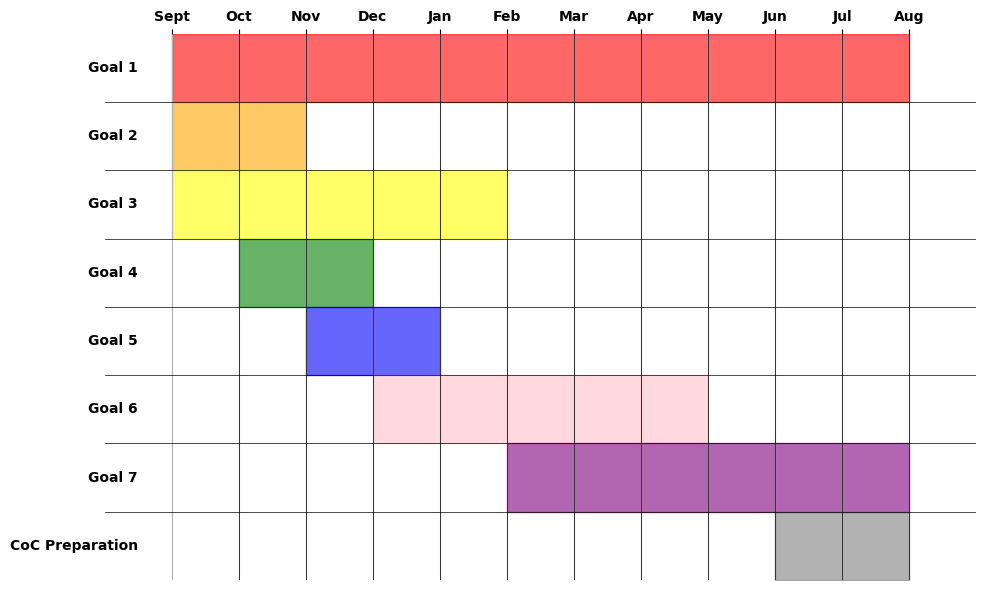

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns
# sns.set_theme()

# Sample data for the yearly plan
months = ["Sept","Oct", "Nov", "Dec","Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"]
goals = ["Goal 1", "Goal 2", "Goal 3", "Goal 4", "Goal 5", "Goal 6", "Goal 7","CoC Preparation"]
dict = {"Goal 1":np.arange(len(months)),
        "Goal 2":np.arange(3),
        "Goal 3":np.arange(6),
        "Goal 4":np.arange(1,4),
        "Goal 5":np.arange(2,5),
        "Goal 6":np.arange(3,9),
        "Goal 7":np.arange(5,len(months)),
        "CoC Preparation":np.arange(len(months)-3,len(months))}


# Create a color palette for different goals
colors = ["red","orange",'yellow','green','blue','pink','purple','gray']

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the grid with colored rows
for i, goal in enumerate(goals):
    y_position = len(goals) - i - 1  # Determine the y position for each row
    ax.fill_between(dict[goal], y_position, y_position + 1, color=colors[i], alpha=0.6)

# Add text labels for goals and months
for i, goal in enumerate(goals):
    y_position = len(goals) - i - 1 + 0.5  # Adjust for centering the text
    ax.text(-0.5, y_position, goal, va='center', ha='right', fontsize=10, weight='bold')

# Set month labels as x-axis ticks
ax.set_xticks(np.arange(len(months)))
ax.set_xticklabels(months, fontsize=10, weight='bold')
ax.xaxis.tick_top()  # Move the ticks to the top
ax.xaxis.set_label_position('top')  # Move the x-axis label to the top

# Adjust the grid for a cleaner look
ax.set_yticks([])  # Remove y-axis ticks
ax.grid(False)  # Remove grid lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add horizontal lines to separate y ticks (the rows)
for i in range(1, len(goals)):
    ax.axhline(i, color='black', linewidth=0.5)

# Add vertical lines to separate the months
for i in range(1, len(months)):
    ax.axvline(i, color='black', linewidth=0.5)

# Set axis limits to show all rows and months
ax.set_xlim(-1, len(months))
ax.set_ylim(0, len(goals))

plt.grid(True)

# Display the yearly plan
# plt.title("First Annual Plan", fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig("annual_plan")
plt.show()
